In [1]:
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
import matplotlib.pylab as plt
import pandas as pd
import urllib,cStringIO
%matplotlib inline

Using Theano backend.


In [2]:
#https://gist.github.com/baraldilorenzo
#Very Deep Convolutional Networks for Large-Scale Image Recognition
#K. Simonyan, A. Zisserman
#arXiv:1409.1556
def VGG_19(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [7]:
def predict(url, plot_image=True):
    urllib.urlretrieve(url, filename='../data/temp_img.jpg')
    
    im = cv2.cvtColor(cv2.resize(cv2.imread('../data/temp_img.jpg'), (224, 224)), cv2.COLOR_BGR2RGB)
    
    if plot_image:
        plt.imshow(im)
        
    im = im.astype(np.float32).transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    
    df_predictions = pd.DataFrame(df_categories)
    df_predictions['probabilites'] = out[0]
    
    return df_predictions.sort_values(by=['probabilites'], ascending=[False]).head()

In [4]:
df_categories = pd.read_csv(r'../data/df_categories.csv', index_col='id')        

In [5]:
# Load and compile pretrained model
model = VGG_19('../models/vgg19_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

,category,probabilites
id,,
734,"police van, police wagon, paddy wagon, patrol ...",0.745736
407,ambulance,0.086503
569,"garbage truck, dustcart",0.050539
654,minibus,0.043687
656,minivan,0.030667


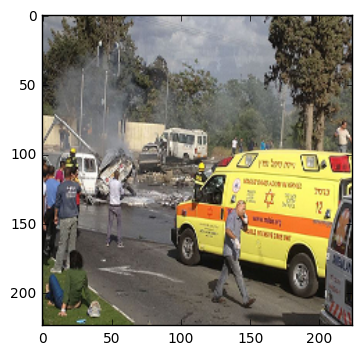

In [8]:
predict(u'http://images1.ynet.co.il/PicServer3/2013/04/10/4561077/1365599915_wa.jpg')